# <img style='float: left' src="http://lightning-viz.github.io/images/logo.png"> <br> <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Force-directed graphs in <a href='http://lightning-viz.github.io/'><font color='#9175f0'>Lightning</font></a>

## <hr> Setup

In [1]:
import os
from lightning import Lightning

from numpy import random, asarray, linspace, corrcoef
from colorsys import hsv_to_rgb
from sklearn import datasets
import networkx as nx

## Connect to server


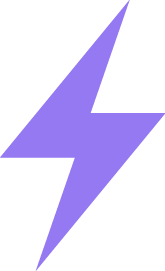

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

In [2]:
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')

## <hr> Random binary network

A random graph where every node has the same degree, with default styling.
<br>
This and other graph plots take matrices (e.g. adjacency matrices) as inputs.
<br>
We use the `networkx` library to generate the graph, then get its adjancency matrix.
<br>
Double click on a point to see its neighbors (all should have 3).
<br>
Drag points to try and move the graph, it should remain tight because of the degree structure.

In [3]:
n = 100
G = nx.random_regular_graph(3,n)
mat = nx.adjacency_matrix(G).todense()
lgn.force(mat)

## <hr> Random weighted network

The previous network was binary (all links either 0 or 1).
Here the links are weighted, which is reflected in the line widths.

In [4]:
G = nx.random_regular_graph(3,100)
mat = asarray(nx.adjacency_matrix(G).todense()) * (((random.rand(100,100))*5) ** 2)
lgn.force(mat)

## <hr> Lobster network

The lobster graph, a backbone with some leaves, is colored here by node ordering.
<br>
We also set all nodes with degree less than 2 to gray.

In [5]:
G = nx.random_lobster(60, 0.5, 0.0, seed=44)
mat = nx.adjacency_matrix(G).todense()
n = len(G.nodes())
c = [list(asarray(hsv_to_rgb(float(x) / n , 0.8, 1.0))*255) if y > 1 else [150,150,150] for (x,y) in G.degree_iter()]
lgn.force(mat, color=c)

## <hr> Coloring by degree

Here we color points (and also change their size) to indicate their degree.
<br>
Click to confirm bigger points have more connections.

In [6]:
G = nx.random_geometric_graph(50, 0.1)
mat = nx.adjacency_matrix(G).todense()
g = G.degree().values()
lgn.force(mat, group=g, size=(asarray(g) + 1.5)*3)

## <hr> Graph of clustering

Graphs can be a useful way to look at data that doesn't neccessarily come from a graph.
<br>
Here we create a graph from a thresholded correlation matrix on data drawn from a set of clusters.
<br>
The cluster identities are clear in the resulting graph.

In [7]:
d, g = datasets.make_blobs(n_features=5, n_samples=50, centers=5, cluster_std=2.0, random_state=100)
c = corrcoef(d)
c[c<0.9] = 0
lgn.force(c, group=g)